In [1]:
import pandas as pd
data = pd.read_csv("data_voiture_clean.csv")
for col in ["model","transmission","fuelType"]:
    data = pd.get_dummies(data,columns=[col],drop_first=True )

In [2]:
data

,marque,year,price,kilometrage,tax,L/100km,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_180,model_200,model_220,model_230,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,audi,2017,14625,25317,175,5.098934,1.4,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,audi,2016,19305,58250,23,4.400015,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,audi,2016,12870,48183,35,5.098934,1.4,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,audi,2017,19656,41756,169,4.197339,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,audi,2019,20241,3214,169,5.695180,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99153,vw,2012,7008,119066,146,4.795941,2.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99154,vw,2008,2104,141756,169,6.101100,1.2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
99155,vw,2009,1860,112630,234,6.725737,1.4,0,0,0,...,0,0,0,0,1,0,0,0,0,1
99156,vw,2006,1462,133070,175,6.101100,1.2,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [3]:
def getXy(standard =True):      
    X = data.drop(columns=["marque","price"]).values.reshape(-1,205)
    y = data["price"].values
    return X,y

In [4]:
from sklearn.model_selection import train_test_split 
def modifieXyTrainTest(X,y):
    Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, random_state = 2, test_size = 0.20)
    return Xtrain, Xtest, ytrain,ytest

In [5]:
X,y = getXy()

In [6]:
#import pandas as pd
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#def getXy(standard =True):
#    data = pd.read_csv("data_voiture_clean.csv")
#    for col in ["model","transmission","fuelType"]:
#        data = pd.get_dummies(data,columns=[col],drop_first=True )     
#    X = data.drop(columns=["marque","price"]).values.reshape(-1,205)
#    y = data["price"].values
#    Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, random_state = 42, test_size = 0.20)
#    return Xtrain, Xtest, ytrain,ytest
#Xtrain, Xtest,ytrain,ytest = getXy()
#reg.fit(Xtrain,ytrain)
#reg.score(Xtest,ytest)

In [7]:
# print(X)

In [8]:
# print(y)

In [9]:
Xtrain,Xtest,ytrain,ytest = modifieXyTrainTest(X,y)

## Isolation Forest

(1967.5, 2022.5, -22444.5, 471356.5)

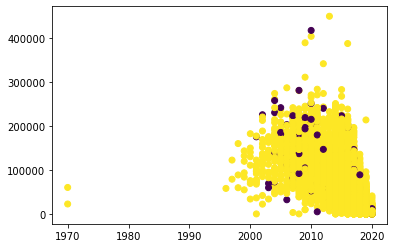

In [10]:
# import
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

modelIsolationForest = IsolationForest(contamination = 0.01, random_state=2, n_estimators=100)
modelIsolationForest.fit(Xtrain)
outliers = modelIsolationForest.predict(Xtrain)
Xtrain = Xtrain[outliers == 1]
ytrain = ytrain[outliers == 1]
plt.scatter(Xtrain[:,0],Xtrain[:,1], c = modelIsolationForest.fit_predict(Xtrain))
# axes= plt.gca()
# print(axes.set_xlim(0,4))
#print("Val axes : ",plt.axis())
plt.axis()

## Regression Lineaire

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regLin = LinearRegression()

In [13]:
regLin.fit(Xtrain,ytrain)

LinearRegression()

In [14]:
regLin.score(Xtest,ytest)

0.876334024717322

## Regression Lasso

In [15]:
from sklearn.linear_model import Lasso

In [16]:
regLasso = Lasso(alpha=0.1,max_iter=1000)

In [17]:
### entrainement du model
regLasso.fit(Xtrain,ytrain)

Lasso(alpha=0.1)

In [18]:
### resultat du model
regLasso.score(Xtest,ytest)

0.8763084939538818

In [19]:
regLasso.predict(Xtest)

array([13776.75890348, 11622.65196006, 19062.14789358, ...,
        8664.79305526, 26326.04600652, 19293.38563874])

In [20]:
ytest

array([14385, 14683, 18369, ...,  9933, 28009, 15204], dtype=int64)

In [21]:
from sklearn.model_selection import GridSearchCV
# lasso_params = {'alpha':[0.01, 0.05, 0.1, 0.15, 0.20]}
# 0.8788319872821607
# lasso_params = {'alpha':[0.005, 0.01, 0.015, 0.02, 0.025]}
# 0.8788348885954073
# lasso_params = {'alpha':[0.025,0.030,0.035]}
# 0.8788348885954073
lasso_params = {'alpha':[0.026]}

In [22]:
gridLasso =  GridSearchCV(regLasso, param_grid=lasso_params).fit(Xtrain, ytrain)
# regLasso2.best_estimator_   ==> permet d'avoir le "meilleur" alpha.
# regLasso2.best_estimator_  
# regLasso2.score(Xtest,ytest)

In [23]:
gridLasso.score(Xtest,ytest)

0.8763441719702545

## Regression Ridge

In [24]:
from sklearn.linear_model import Ridge

In [25]:
regRidge = Ridge(alpha = 0.1)

In [26]:
regRidge.fit(Xtrain, ytrain)

Ridge(alpha=0.1)

In [27]:
### resultat du model
regRidge.score(Xtest,ytest)

0.8763377886150077

In [28]:
regRidge.predict(Xtest)

array([13782.58054593, 11623.8199282 , 19104.31114407, ...,
        8656.8662872 , 26293.40689054, 19264.09852272])

In [29]:
ridge_params = {'alpha':[0.026]}

In [30]:
gridRidge =  GridSearchCV(regRidge, param_grid=ridge_params).fit(Xtrain, ytrain)

In [31]:
gridRidge.score(Xtest,ytest)

0.8763353501216602

## RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
modelRandomForestRegressor = RandomForestRegressor(random_state=2)

In [34]:
modelRandomForestRegressor.fit(Xtrain,ytrain)

RandomForestRegressor(random_state=2)

In [35]:
modelRandomForestRegressor.score(Xtest,ytest)

0.9575167384303495

In [36]:
# from sklearn.model_selection import learning_curve



In [37]:
# n, train_score, val_score = learning_curve(modelRandomForestRegressor, Xtrain,ytrain,cv=5)


In [38]:
# plt.plot(n, train_score.mean(axis=1),label='train_score')
# plt.plot(n, val_score.mean(axis=1),label='val_score')
# plt.legend()
# plt.show()

In [39]:
# randomForest_params = {'max_depth':[50,100,None]}

In [40]:
# gridRandomForest =  GridSearchCV(RandomForestRegressor(random_state=2), param_grid=randomForest_params).fit(Xtrain, ytrain)

## SVR

In [41]:
# from sklearn.svm import SVR

In [42]:
# modelSVR = SVR(kernel='linear',max_iter=100)

In [43]:
# modelSVR.fit(Xtrain,ytrain)

In [44]:
# modelSVR.score(Xtest,ytest) #rebouger aux params et ne donnera surement rien comme ça mais plante ici

## PolynomialFeatures

In [45]:
# from sklearn.preprocessing import PolynomialFeatures

In [46]:
#X_poly = PolynomialFeatures(2).fit_transform(X)

In [47]:
#testModel = LinearRegression().fit(X_poly,y)
#y_pred = testModel.predict(X_poly)

In [48]:
# polynomial + pca(standardiser avant) + selectKBest + (pipeline + make_pipeline) + matrice corrélation + 
# confusion

## IsolationForest pour detecter les outlier. 

In [49]:
# import matplotlib.pyplot as plt
# from sklearn.ensemble import IsolationForest
# modelIsolationForest = IsolationForest(contamination = 0.01, random_state=2, n_estimators=100)
# modelIsolationForest.fit(Xtrain)

In [50]:
# modelIsolationForest.predict(Xtrain)[0]

In [51]:
# modelIsolationForest.predict(Xtrain)
# #print("Prediction : ",clf.fit_predict(Xtrain))

In [52]:
# outliers = modelIsolationForest.predict(Xtrain) == -1

In [53]:
# outliers

In [54]:
# plt.scatter(Xtrain[:,0],Xtrain[:,1], c = modelIsolationForest.fit_predict(Xtrain))
# # axes= plt.gca()
# # print(axes.set_xlim(0,4))
# #print("Val axes : ",plt.axis())
# plt.axis()

In [55]:
#verif sur les prix négatif
#dataBis.loc[dataBis["price"]<=0].value_counts()

In [56]:
# dataBis.loc[dataBis["year"]<1997].value_counts()

In [57]:
# from sklearn.decomposition import PCA

# modelPCA =PCA(n_components=10) #ou le nombre total de dimensions ou directement le % de la variance expliquée

# modelPCA.fit_tranform(Xtrain)

In [58]:
# plt.plot(np.cumsum(modelPCA.explained_variance_ratio_))
# np.argmax(np.cumsum(modelPCA.explained_variance_ratio_) > 0.90) # le nombre ici nous permet de remodifier le n_components


## StackingRegressor

In [59]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
from sklearn.ensemble import StackingRegressor

In [60]:
regStacking = StackingRegressor(estimators=[('linear',LinearRegression()),('rfr',RandomForestRegressor(random_state=2))],final_estimator=LinearRegression(),cv=5)

In [61]:
regStacking.fit(Xtrain,ytrain)

StackingRegressor(cv=5,
                  estimators=[('linear', LinearRegression()),
                              ('rfr', RandomForestRegressor(random_state=2))],
                  final_estimator=LinearRegression())

In [62]:
regStacking.score(Xtest,ytest)

0.9587848429081849

In [63]:
# regStacking.best_params_

## Enregistrement Model


In [64]:
from joblib import dump,load

dump(regStacking, 'model_voiture.joblib')

['model_voiture.joblib']

In [65]:
new_model = load('model_voiture.joblib')
new_model

StackingRegressor(cv=5,
                  estimators=[('linear', LinearRegression()),
                              ('rfr', RandomForestRegressor(random_state=2))],
                  final_estimator=LinearRegression())

In [66]:
new_model.score(Xtest,ytest)

0.9587848429081849

## Fonction

In [67]:
columns = data.columns
print(columns)

Index(['marque', 'year', 'price', 'kilometrage', 'tax', 'L/100km',
       'engineSize', 'model_ 2 Series', 'model_ 3 Series', 'model_ 4 Series',
       ...
       'model_180', 'model_200', 'model_220', 'model_230',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object', length=207)


In [68]:
# param
# marque year price kilometrage tax L/100km engineSize
import numpy as np

#je voulais l'appeler nostradaprice()
def predict_price(model, year, km, lkm, enginesize, transmission, fueltype, stackingReg): 
    data = pd.read_csv("data_voiture_clean.csv")
    data = data.drop(columns = ['marque', 'tax', 'price'])
    X = pd.DataFrame(np.array([model, year, km, lkm, enginesize, transmission, fueltype]).reshape(-1,7), columns=['model', 'year', 'kilometrage', 'L/100km', 'engineSize', 'transmission', 'fuelType'])
    data = data.append(X)
    for col in ["model","transmission","fuelType"]:
        data = pd.get_dummies(data,columns=[col],drop_first=True )
    
    X = data.iloc[-1]
    X = X.values.reshape(-1,205)
    return stackingReg.predict(X)

predict_price('Focus', 2018, 42570, 5.80, 1.4, 'Automatic', 'Petrol', new_model)

array([15990.72620423])

In [69]:
#je voulais l'appeler nostradaprice()
def predict_price(model, year, km, lkm, enginesize, tax, transmission, fueltype, stackingReg, columns):  
    data = pd.DataFrame(columns = columns)    
    data = data.drop(columns = ['marque', 'price'])
    # Créer une ligne avec des 0 pour chaque columns
    # Remplacer par des 1 pour chaque columns dans le predict_price()
    return stackingReg.predict(X)

predict_price('Focus', 2018, 42570, 5.80, 1.4, 120, 'Automatic', 'Petrol', new_model, columns)

array([15379.51399309, 19571.28917403, 13650.41473514, ...,
        2644.03419999,  1301.8998425 ,  2165.90314941])